In [1]:
from solar_hale import SolarHALE
import gpkit
gpkit.settings['latex_modelname'] = False

# this notebook is for interactive controlpanel() use
# to modify the SolarHALE model, edit solar_hale.py
m = SolarHALE()
sol = m.solve()
# m.controlpanel()

Using solver 'cvxopt'
Solving for 19 variables.
Solving took 0.0644 seconds.

Cost
----
 41.44 [lbf] 

Free Variables
--------------
         C_D : 0.06743              Drag coefficient              
         C_L : 1.5                  Lift coefficient              
         C_f : 0.006784             wing skin friction coefficient
    E_{batt} : 7.365e+06  [J]       Battery energy                
  P_{charge} : 179.5      [W]       Battery charging power        
    P_{oper} : 162        [W]       Aircraft operating power      
   P_{shaft} : 152        [W]       Shaft power                   
          Re : 1.545e+05            Reynolds number               
           S : 3.414      [m**2]    Wing reference area           
     T_{atm} : 226.2      [K]       air temperature               
           V : 12.84      [m/s]     Cruise velocity               
           W : 41.44      [lbf]     Aircraft weight               
W_{airframe} : 10.36      [lbf]     Airframe weight            

In [3]:
import numpy as np
m.substitutions.update({"d_{footprint}": ('sweep', np.linspace(100, 300, 13)),
                        "h_{batt}": ('sweep', np.linspace(150, 250, 13))})
sol = m.solve(solver="mosek", verbosity=0, skipsweepfailures=True)

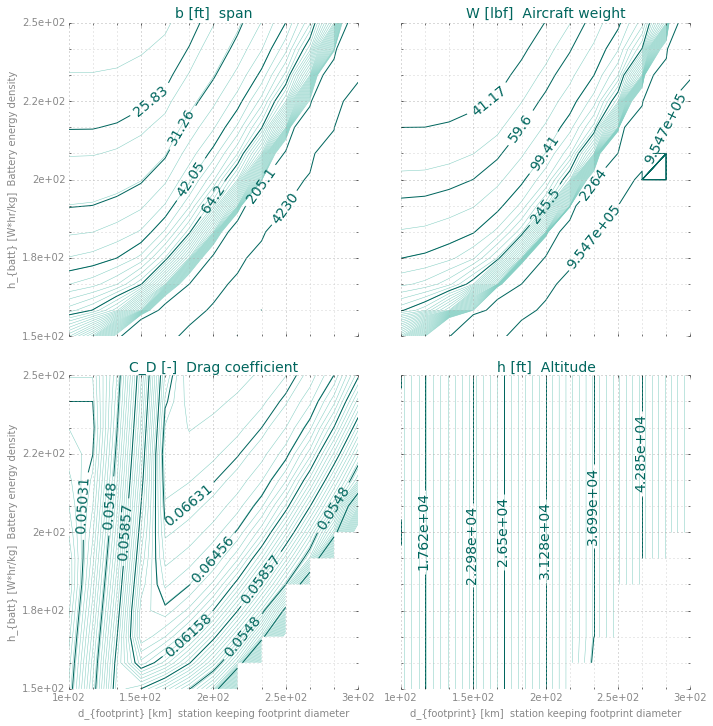

In [5]:
%matplotlib inline
from gpkit.interactive.plotting import contour_array
_ = contour_array(m, "d_{footprint}", "h_{batt}", ["b", "W", "C_D", "h"])